In [ ]:
import re
import csv
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
file = open('../allPoetry.txt', encoding="utf8")

In [ ]:
allPoems=pd.read_csv("../allPoetry.txt",sep= " \t" ,error_bad_lines=False, engine = 'python',encoding = "utf-8")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
vect = TfidfVectorizer()

In [ ]:
X = vect.fit_transform(allPoems.allpoems)

In [ ]:
model = NMF(n_components=5, random_state=5)

In [ ]:
model.fit(X)

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


NMF(n_components=5, random_state=5)

In [ ]:
nmf_features = model.transform(X)

In [ ]:
components_df = pd.DataFrame(model.components_, columns=vect.get_feature_names())
components_df

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abaza,abd,abdullah,abece,abeceyle,abim,ablası,ablasının,acalesi,acan,...,şöyleşemedik,şüphe,şüpheler,şüphesiz,şık,şımartan,şımartmadım,şıp,şıppadak,şıçramış
0,0.000932,0.001723,0.002413,0.001723,0.001278,0.006029,0.002352,0.002699,0.004136,0.001454,...,0.00451,0.002139,0.004278,0.018551,0.002699,0.004257,0.002108,0.007981,0.002139,0.005065
1,0.000652,0.000000,0.000000,0.000000,0.000260,0.000000,0.000000,0.000006,0.000000,0.000344,...,0.00000,0.000000,0.000000,0.000000,0.000006,0.000000,0.000094,0.000000,0.000000,0.000000
2,0.003286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000826,0.000533,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000533,0.000000,0.000310,0.001800,0.000000,0.000346
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000212,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000212,0.000000,0.001025,0.000000,0.000000,0.000705
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000054,0.000000,0.000000,0.000000,0.000000


In [ ]:
for topic in range(components_df.shape[0]):
    tmp = components_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10))
    print('\n')

For topic 1 the words with the highest value are:
zaman      0.253974
gün        0.193473
aşk        0.144173
uzun       0.143163
gece       0.129934
yağmur     0.126299
yaşamak    0.123954
akşam      0.120166
güzel      0.119461
iki        0.111012
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
yolculuk         0.352092
yüksekliğince    0.346050
yere             0.330498
dalından         0.312344
ayrı             0.278296
dalın            0.213590
inmek            0.193682
gideceğim        0.173025
gördüklerim      0.173025
havası           0.173025
Name: 1, dtype: float64


For topic 3 the words with the highest value are:
bi            0.264983
diyor         0.244385
diyelim       0.220055
bulacaksın    0.210722
eylim         0.210722
uça           0.210722
çil           0.210722
herif         0.205317
çakmak        0.199493
evin          0.191956
Name: 2, dtype: float64


For topic 4 the words with the highest value are:
kar            0.455796
düşsün  

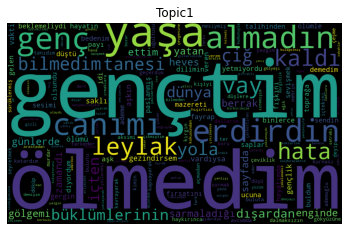

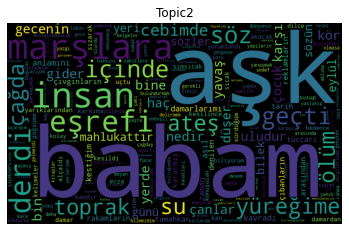

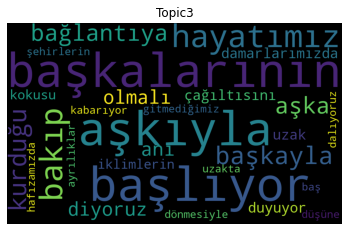

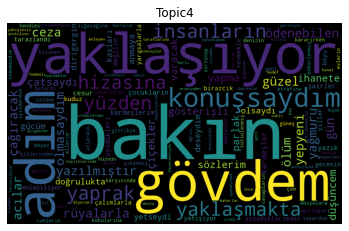

In [ ]:
for i in range(4):
  wc = WordCloud(width=1000, height=600, margin=3,  prefer_horizontal=0.7,scale=1,background_color='black', relative_scaling=0).generate(allPoems.allpoems[i])
  plt.imshow(wc)
  plt.title(f"Topic{i+1}")
  plt.axis("off")
  plt.show()